<a href="https://colab.research.google.com/github/KarolMc/msc_dissertation/blob/main/tuned_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import joblib

import pandas as pd
import numpy as np

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer

import random

random_seed = random.seed(42)

from sklearn.preprocessing import LabelEncoder

In [3]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import graphviz

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [6]:
!pip install lightgbm
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import lightgbm as lgb
import catboost
import xgboost as xgb


In [8]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install pytorch_tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [12]:
X_train = pd.read_csv('/content/drive/MyDrive/NHANES/file_files/X_train_multiselected.csv', index_col=[0])
y_train = pd.read_csv('/content/drive/MyDrive/NHANES/file_files/y_train_ROS.csv', index_col=[0])
X_test = pd.read_csv('/content/drive/MyDrive/NHANES/file_files/X_test_multiselected.csv', index_col=[0])
y_test = pd.read_csv('/content/drive/MyDrive/NHANES/file_files/y_test.csv', index_col=[0])

train_features = X_train.columns


le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_test = le.fit_transform(y_test)

X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size=0.25)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train_val,'y_train':y_train_val,
                'X_val': X_validation,'y_val':y_validation,
                'X_test': X_test,'y_test':y_test}

In [14]:
# import tuned models

In [15]:
catb_model = joblib.load('/content/drive/MyDrive/NHANES/file_files/models/CBC_tuned.joblib')


In [ ]:
xgb_model = joblib.load('/content/drive/MyDrive/NHANES/file_files/models/xgb_early_stop.joblib')


In [16]:
lgbm_model = joblib.load('/content/drive/MyDrive/NHANES/file_files/models/lgbm_tuned.joblib')


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
tabnet_model = joblib.load('/content/drive/MyDrive/NHANES/file_files/models/pretrained_tabnet.joblib')

ModuleNotFoundError: ignored

In [18]:
classifiers = []

In [19]:
# model1 = xgb_model
# classifiers.append(model1)
model2 = catb_model
classifiers.append(model2)
model3 = lgbm_model
classifiers.append(model3)
# model4 = tabnet_model
# classifiers.append(model4)


In [20]:
for clf in classifiers:
    clf.fit(training_data['X_train'].values, training_data['y_train'],
    eval_set=[(training_data['X_train'].values, training_data['y_train']), (training_data['X_val'].values, training_data['y_val'])] )
    y_pred= clf.predict(training_data['X_test'].values)
    acc = accuracy_score(training_data['y_test'], y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(training_data['y_test'], y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

0:	learn: 1.0328370	test: 1.0328370	test1: 1.0335500	best: 1.0335500 (0)	total: 661ms	remaining: 9m 54s
1:	learn: 0.9771449	test: 0.9771449	test1: 0.9793421	best: 0.9793421 (1)	total: 1.46s	remaining: 10m 56s
2:	learn: 0.9326896	test: 0.9326896	test1: 0.9360520	best: 0.9360520 (2)	total: 2.24s	remaining: 11m 10s
3:	learn: 0.8944668	test: 0.8944668	test1: 0.8989972	best: 0.8989972 (3)	total: 3.06s	remaining: 11m 25s
4:	learn: 0.8607313	test: 0.8607313	test1: 0.8663511	best: 0.8663511 (4)	total: 3.85s	remaining: 11m 29s
5:	learn: 0.8296831	test: 0.8296831	test1: 0.8367474	best: 0.8367474 (5)	total: 4.3s	remaining: 10m 41s
6:	learn: 0.8042820	test: 0.8042820	test1: 0.8127284	best: 0.8127284 (6)	total: 4.75s	remaining: 10m 5s
7:	learn: 0.7801411	test: 0.7801411	test1: 0.7902154	best: 0.7902154 (7)	total: 5.21s	remaining: 9m 40s
8:	learn: 0.7586538	test: 0.7586538	test1: 0.7697363	best: 0.7697363 (8)	total: 5.64s	remaining: 9m 18s
9:	learn: 0.7391157	test: 0.7391157	test1: 0.7513873	best: 0

In [21]:
cms = []

0:	learn: 1.0328370	test: 1.0328370	test1: 1.0335500	best: 1.0335500 (0)	total: 455ms	remaining: 6m 48s
1:	learn: 0.9771449	test: 0.9771449	test1: 0.9793421	best: 0.9793421 (1)	total: 901ms	remaining: 6m 44s
2:	learn: 0.9326896	test: 0.9326896	test1: 0.9360520	best: 0.9360520 (2)	total: 1.34s	remaining: 6m 42s
3:	learn: 0.8944668	test: 0.8944668	test1: 0.8989972	best: 0.8989972 (3)	total: 1.79s	remaining: 6m 40s
4:	learn: 0.8607313	test: 0.8607313	test1: 0.8663511	best: 0.8663511 (4)	total: 2.25s	remaining: 6m 43s
5:	learn: 0.8296831	test: 0.8296831	test1: 0.8367474	best: 0.8367474 (5)	total: 2.69s	remaining: 6m 40s
6:	learn: 0.8042820	test: 0.8042820	test1: 0.8127284	best: 0.8127284 (6)	total: 3.13s	remaining: 6m 38s
7:	learn: 0.7801411	test: 0.7801411	test1: 0.7902154	best: 0.7902154 (7)	total: 3.59s	remaining: 6m 40s
8:	learn: 0.7586538	test: 0.7586538	test1: 0.7697363	best: 0.7697363 (8)	total: 4.03s	remaining: 6m 39s
9:	learn: 0.7391157	test: 0.7391157	test1: 0.7513873	best: 0.751

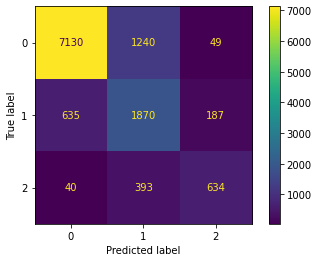

[1]	valid_0's multi_logloss: 1.02781	valid_1's multi_logloss: 1.03164
[2]	valid_0's multi_logloss: 0.966602	valid_1's multi_logloss: 0.974317
[3]	valid_0's multi_logloss: 0.91269	valid_1's multi_logloss: 0.923489
[4]	valid_0's multi_logloss: 0.865483	valid_1's multi_logloss: 0.879178
[5]	valid_0's multi_logloss: 0.823315	valid_1's multi_logloss: 0.839831
[6]	valid_0's multi_logloss: 0.785119	valid_1's multi_logloss: 0.803811
[7]	valid_0's multi_logloss: 0.751097	valid_1's multi_logloss: 0.772265
[8]	valid_0's multi_logloss: 0.765341	valid_1's multi_logloss: 0.785506
[9]	valid_0's multi_logloss: 0.732572	valid_1's multi_logloss: 0.755427
[10]	valid_0's multi_logloss: 0.702774	valid_1's multi_logloss: 0.727748
[11]	valid_0's multi_logloss: 0.675049	valid_1's multi_logloss: 0.701914
[12]	valid_0's multi_logloss: 0.685362	valid_1's multi_logloss: 0.711539
[13]	valid_0's multi_logloss: 0.659843	valid_1's multi_logloss: 0.687947
[14]	valid_0's multi_logloss: 0.635699	valid_1's multi_logloss:

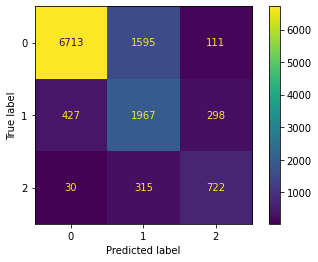

In [22]:
for clf in classifiers:
    clf.fit(training_data['X_train'].values, training_data['y_train'],
    eval_set=[(training_data['X_train'].values, training_data['y_train']), (training_data['X_val'].values, training_data['y_val'])] )
    y_pred= clf.predict(training_data['X_test'].values)
    acc = accuracy_score(training_data['y_test'], y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    target_names = ['class 1', 'class 2', 'class 3']
    report_matrix = []
    report = classification_report(training_data['y_test'], y_pred, target_names=target_names)
    report_matrix.append(report)
    print(report)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    report_matrix.append(cm)
    cms.append(report_matrix)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
    plt.show()

# Model Comparison

## Accuracy

XGBoost: 0.8010346526523239 <br />
Catboost: 0.7933158154048284 <br />
Light GBM: 0.7835440959106585 <br />
TabNet: 0.7597306618492363

## Classification reports

XGBoost: <br />
              

               precision    recall  f1-score   support
     class 1       0.91      0.87      0.89      8419
     class 2       0.56      0.68      0.61      2692
     class 3       0.76      0.57      0.65      1067

    accuracy                           0.80     12178
    macro avg       0.74      0.71      0.72     12178
    weighted avg       0.82      0.80      0.81     12178 
    
<br />
<br />

Catboost: <br />



                precision    recall  f1-score   support
     class 1       0.92      0.85      0.88      8419
     class 2       0.54      0.71      0.61      2692
     class 3       0.72      0.60      0.65      1067

    accuracy                           0.79     12178
    macro avg       0.72      0.72      0.71     12178
    weighted avg       0.82      0.79      0.80     12178
    
<br />
<br />

Light GBM: <br />
<br />



                precision    recall  f1-score   support
     class 1       0.93      0.82      0.87      8419
     class 2       0.52      0.73      0.61      2692
     class 3       0.68      0.64      0.66      1067

    accuracy                           0.78     12178
    macro avg       0.71      0.73      0.71     12178
    weighted avg       0.82      0.78      0.79     12178
    
    
TabNet: <br />
<br />



                 precision    recall  f1-score   support
     class 1       0.92      0.81      0.86      8419
     class 2       0.49      0.69      0.57      2692
     class 3       0.60      0.58      0.59      1067

    accuracy                           0.76     12178
    macro avg       0.67      0.69      0.67     12178
    weighted avg       0.80      0.76      0.77     12178

XGBoost: 

![Screenshot 2023-01-25 at 10.46.47.png](attachment:a6831bf7-00b2-4dbd-9baa-168d926bc0a2.png)

Catboost:

![Screenshot 2023-01-25 at 10.46.11.png](attachment:3875d280-6599-447c-af53-c00deb69c51d.png)

LightGBM

![Screenshot 2023-01-25 at 10.45.49.png](attachment:ed714894-0be0-4ac5-ab05-e38acb79bc56.png)

TabNet

![Screenshot 2023-01-25 at 10.45.10.png](attachment:a699d0e3-59e1-482f-9044-ffec08bae298.png)